<a href="https://colab.research.google.com/github/aditipriya25/ISRO/blob/main/Dog_vs_Cat_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 232MB/s]
100% 1.06G/1.06G [00:04<00:00, 235MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image, label

  train_ds=train_ds.map(process)
  validation_ds=validation_ds.map(process)

In [ ]:
# create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 59s 83ms/step - loss: 2.6861 - accuracy: 0.5240 - val_loss: 0.6887 - val_accuracy: 0.5090
Epoch 2/10
625/625 [==============================] - 54s 87ms/step - loss: 0.6832 - accuracy: 0.5516 - val_loss: 0.6850 - val_accuracy: 0.5710
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.6634 - accuracy: 0.5889 - val_loss: 0.7461 - val_accuracy: 0.5652
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 0.6030 - accuracy: 0.6457 - val_loss: 0.8838 - val_accuracy: 0.5738
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.5302 - accuracy: 0.6967 - val_loss: 1.1828 - val_accuracy: 0.5708
Epoch 6/10
625/625 [==============================] - 49s 79ms/step - loss: 0.4948 - accuracy: 0.7244 - val_loss: 1.2117 - val_accuracy: 0.5660
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4430 - accuracy: 0.7634 - val_loss: 1.3299 - val_accuracy:

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/pexels-tranmautritam-245035.jpg')

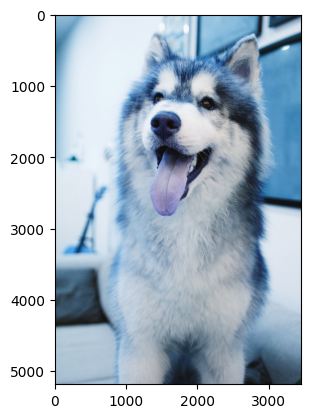

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(5184, 3456, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 475ms/step


array([[0.21602139]], dtype=float32)

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/pexels-pixabay-45201.jpg')

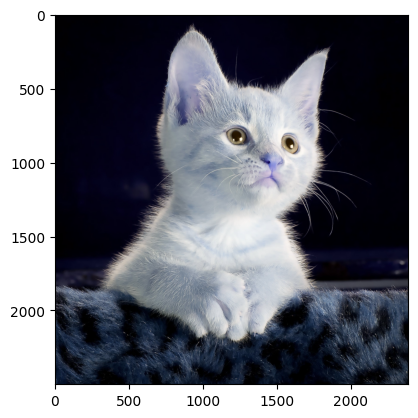

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(2500, 2392, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[3.3397918e-10]], dtype=float32)